In [32]:
import warnings
warnings.filterwarnings("ignore") # ignores all warnings 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to display all rows and columns 
pd.set_option("display.max_rows",None)#get_option returns current settings
# None=> no limits to max number of rows
pd.set_option("display.max_columns",None)
pd.set_option("display.expand_frame_repr",False)
#prevents data frame from wrapping to the next line
pd.set_option("max_colwidth",-1)

In [33]:
df=pd.read_csv("ODI_data.csv")

In [34]:
df.head(10)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,JO Holder,13*,13,38,1.0,1.0,19,0,0,68.42,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CH Gayle,11,11,49,1.0,0.0,24,1,0,45.83,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SD Hope,5,5,14,1.0,0.0,10,0,0,50,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CR Brathwaite,0,0,5,1.0,0.0,3,0,0,0,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KAJ Roach,0,0,5,1.0,0.0,3,0,0,0,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.shape

(171968, 28)

In [36]:
"""
Runs per innings
SR
100s
50s
Team contribution = player runs/team runs
"""

'\nRuns per innings\nSR\n100s\n50s\nTeam contribution = player runs/team runs\n'

In [37]:
#In order to check if data in a column requires modification,
# we use .unique() func
df["Innings Runs Scored Num"].unique()
# nan => not a number

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [38]:
df=df[df["Innings Runs Scored Num"]!="-"]
# removing the rows with "-"
df["Innings Runs Scored Num"].unique()


array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', nan, '40', '6', '4', '87', '54', '46', '30',
       '12', '69', '39', '14', '10', '9', '8', '7', '82', '52', '41',
       '15', '98', '43', '19', '111', '48', '36', '25', '67', '60', '84',
       '59', '55', '47', '85', '49', '45', '34', '29', '22', '74', '28',
       '77', '50', '32', '23', '35', '122', '100', '95', '103', '113',
       '53', '96', '27', '64', '58', '33', '31', '73', '56', '86', '62',
       '106', '24', '57', '104', '26', '66', '51', '118', '105', '101',
       '21', '79', '44', '102', '88', '80', '72', '97', '68', '89', '38',
       '83', '63', '148', '166', '90', '76', '37', '70', '124', '94',
       '140', '153', '107', '117', '121', '92', '78', '75', '114', '115',
       '130', '128', '151', '110', '138', '135', '109', '61', '179',
       '170', '112', '116', '91', '143', '93', '123', '145', '81', '150',
       '162', '108', '131', '133', '137', '146', '139', '125'

In [39]:
df=df.dropna(subset=["Innings Runs Scored Num"])
# not including the subset attribute results in all of them, 
# ie in the entire table getting dropped/removed
df["Innings Runs Scored Num"].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [40]:
#To utilise the innings date column, we must first convert it
# to the datetime format(assuming data is present in string)
df["Innings Date"]=pd.to_datetime(df["Innings Date"])

In [41]:
df["Year"]=df["Innings Date"].dt.year
# the year column gets created if not present
# dt=> datetime object
df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [42]:
"""
Which timeline to choose for comparison? 
Sachin's 1st 100 => 1994
Virat's 1st 100 => 2009
Considering 11 years
ST => 1994-2004
VK => 2009-2019
"""


"\nWhich timeline to choose for comparison? \nSachin's 1st 100 => 1994\nVirat's 1st 100 => 2009\nConsidering 11 years\nST => 1994-2004\nVK => 2009-2019\n"

In [43]:
# ST_df= df[(df["Year"]>=1994) & (df["Year"]<=2004)]
# VK_df= df[(df["Year"]>=2009) & (df["Year"]<=2019)]
# # collecting generational data

In [44]:
# ST_df.head(2)

In [45]:
df.dtypes

Innings Player                   object        
Innings Runs Scored              object        
Innings Runs Scored Num          object        
Innings Minutes Batted           object        
Innings Batted Flag              float64       
Innings Not Out Flag             float64       
Innings Balls Faced              object        
Innings Boundary Fours           object        
Innings Boundary Sixes           object        
Innings Batting Strike Rate      object        
Innings Number                   object        
Opposition                       object        
Ground                           object        
Innings Date                     datetime64[ns]
Country                          object        
50's                             float64       
100's                            float64       
Innings Runs Scored Buckets      object        
Innings Overs Bowled             object        
Innings Bowled Flag              float64       
Innings Maidens Bowled           object 

In [46]:
#.astype() => used to change datatypes of pandas objects
df["Innings Runs Scored Num"]=df["Innings Runs Scored Num"].astype("int")

In [47]:
df["Innings Balls Faced"]=df["Innings Balls Faced"].astype("int")

In [48]:
df["Innings Not Out Flag"]=df["Innings Not Out Flag"].astype("int")
# not out flag => either a 0 or 1

In [49]:
# ST_df.dtypes

In [50]:
ST_df= df[(df["Year"]>=1994) & (df["Year"]<=2004)]
VK_df= df[(df["Year"]>=2009) & (df["Year"]<=2019)]
# collecting generational data

In [51]:
# ST_df.to_csv("sachin_data.csv")
# used to convert the data frame to a csv file

In [52]:
sdf=ST_df[ST_df['Innings Player']=="SR Tendulkar"]
vdf=VK_df[VK_df['Innings Player']=="V Kohli"]
# getting player exclusive data

## Comparison based on selected parameters

In [53]:
# calculating Runs Per Innings (RPI)
rpiST=sum(sdf["Innings Runs Scored Num"])/len(sdf)
rpiVK=sum(vdf["Innings Runs Scored Num"])/len(vdf)
print("Sachin's RPI :",rpiST)
print("Virat's RPI :",rpiVK)

Sachin's RPI : 43.608856088560884
Virat's RPI : 50.20982142857143


In [54]:
# calculating strike rate
srST=sum(sdf["Innings Runs Scored Num"])/sum(sdf["Innings Balls Faced"])
srVK=sum(vdf["Innings Runs Scored Num"])/sum(vdf["Innings Balls Faced"])
print("Sachin's SR :",srST*100)
print("Virat's SR :",srVK*100)

Sachin's SR : 88.21377920429947
Virat's SR : 93.56126778138258


In [55]:
# 50's and 100's
s100=sum(sdf["100's"])
s50=sum(sdf["50's"])
v100=sum(vdf["100's"])
v50=sum(vdf["50's"])
print("Sachin\n100's:",s100)
print("50's:",s50,"\n")
print("Virat\n100's:",v100)
print("50's:",v50)


Sachin
100's: 37.0
50's: 57.0 

Virat
100's: 42.0
50's: 53.0


In [56]:
# Calculating team contribution
# Sachin
tcs=sum(sdf["Innings Runs Scored Num"])/sum(ST_df[ST_df["Country"]=="India"]["Innings Runs Scored Num"])
print("Sachin's score contribution :",tcs*100)
#Virat
tcv=sum(vdf["Innings Runs Scored Num"])/sum(VK_df[VK_df["Country"]=="India"]["Innings Runs Scored Num"])
print("Virat's score contribution :",tcv*100)


Sachin's score contribution : 16.951875493078962
Virat's score contribution : 17.610033350556627


## Visualizations

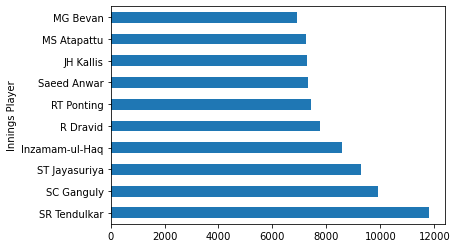

In [57]:
# Top 10 batsmen
ST_df.groupby(ST_df["Innings Player"])["Innings Runs Scored Num"].sum().sort_values(ascending=False).head(10).plot(kind="barh")
# sort_values() => used to sort dataframes(columns)
plt.show()


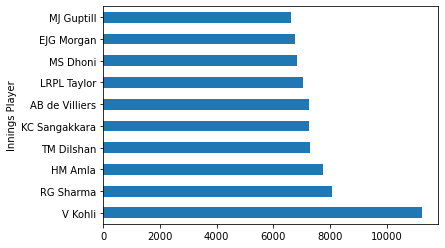

In [58]:
VK_df.groupby(VK_df["Innings Player"])["Innings Runs Scored Num"].sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.show()

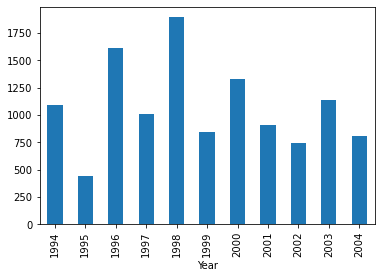

In [59]:
# Performance over the years-Sachin
sdf.groupby(sdf["Year"])["Innings Runs Scored Num"].sum().plot(kind="bar")
plt.show()

[]

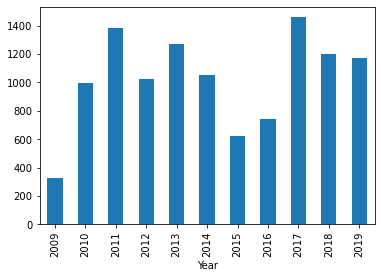

In [60]:
# Performance over the years- Kohli
vdf.groupby(vdf["Year"])["Innings Runs Scored Num"].sum().plot(kind="bar")
plt.plot()

## Normalization

In [70]:
# Comparing RPI to average RPI of that time period
# Sachin
nons=ST_df[ST_df["Innings Player"]!="SR Tendulkar"]
nonsRPI=nons["Innings Runs Scored Num"].sum()/len(nons)
print("Average RPI at the time:",nonsRPI)
print("Sachin's RPI :",rpiST)
print("Ratio:",rpiST/nonsRPI)


Average RPI at the time: 22.43512946754194
Sachin's RPI : 43.608856088560884
Ratio: 1.9437755485945407


In [69]:
# Comparing RPI to RPI excluding Kohli in that time period
# Virat
nonv=VK_df[VK_df["Innings Player"]!="V Kohli"]
nonvRPI=nonv["Innings Runs Scored Num"].sum()/len(nonv)
print("Average RPI at the time:",nonvRPI)
print("Kohli's RPI :",rpiVK)
print("Ratio:",rpiVK/nonvRPI)

Average RPI at the time: 24.737756786500366
Kohli's RPI : 50.20982142857143
Ratio: 2.029683688052565


In [77]:
# Strike rate 
# Sachin
print("Sachin's SR :",srST*100)
nosrst=ST_df[ST_df["Innings Player"]!="SR Tendulkar"]["Innings Runs Scored Num"].sum()/(ST_df[ST_df["Innings Player"]!="SR Tendulkar"]["Innings Balls Faced"].sum())
print("Average SR of the rest at the time :",nosrst*100)
print("Ratio:",srST/nosrst)



Sachin's SR : 88.21377920429947
Average SR of the rest at the time : 72.33808936558636
Ratio: 1.2194651528391862


In [78]:
# Strike rate 
# Virat
print("Virat's SR :",srVK*100)
nosrvk=VK_df[VK_df["Innings Player"]!="V Kohli"]["Innings Runs Scored Num"].sum()/(VK_df[VK_df["Innings Player"]!="V Kohli"]["Innings Balls Faced"].sum())
print("Average SR of the rest at the time :",nosrvk*100)
print("Ratio:",srVK/nosrvk)


Virat's SR : 93.56126778138258
Average SR of the rest at the time : 83.42743413330611
Ratio: 1.121468839996732


In [79]:
# Contribution %
# Sachin
gs=sdf["Innings Runs Scored Num"].sum()/ST_df[ST_df["Country"]=="India"]["Innings Runs Scored Num"].sum()
print("Sachin's team contribution(in terms of runs scored):",gs*100)

Sachin's team contribution(in terms of runs scored): 16.951875493078962


In [80]:
# Contribution %
# Virat
gv=vdf["Innings Runs Scored Num"].sum()/VK_df[VK_df["Country"]=="India"]["Innings Runs Scored Num"].sum()
print("Virat's team contribution(in terms of runs scored):",gv*100)

Virat's team contribution(in terms of runs scored): 17.610033350556627
